In [1]:
import os

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import tensorflow as tf
import numpy as np
import pickle
import json
from sklearn.model_selection import train_test_split
from tensorflow.contrib import layers
from tensorflow.contrib import rnn
from tensorflow.contrib import seq2seq
from seq2seq.rnn_seq2seq import DynamicSeq2Seq
from seq2seq.batch_utils import time_major_batch

In [4]:
with open("data/pph1_enc.pkl", "rb") as fout:
    pph1_enc = pickle.load(fout)
with open("data/pph2_enc.pkl", "rb") as fout:
    pph2_enc = pickle.load(fout)
with open("data/pph_vocab.txt") as fin:
    vocab = fin.readlines()
with open("data/token2id.json") as fout:
    token2id = json.load(fout)
with open("data/id2token.json") as fout:
    id2token = json.load(fout)
    id2token = {int(key):value for key, value in id2token.items()}

unk_id = 2
unk = " "
encode = lambda line: list(map(lambda t: token2id.get(t, unk_id), line))
decode = lambda line: "".join(list(map(lambda i: id2token.get(i, unk), line)))

indices = np.arange(len(pph1_enc))
train_ids, val_ids = train_test_split(indices, test_size=0.2, random_state=42)

train_input = [pph1_enc[i] for i in train_ids]
train_target = [pph2_enc[i] for i in train_ids]
train_data = list(zip(train_input, train_target))

val_input = [pph1_enc[i] for i in val_ids]
val_target = [pph2_enc[i] for i in val_ids]
val_data = list(zip(val_input, val_target))

vocab_size = len(vocab) + 3
emb_size = 64

encoder_args = {
    "cell": rnn.LSTMCell(256),
    "bidirectional": True,
}

decoder_args = {
    "cell": rnn.LSTMCell(512),
    "attention": True,
}

model = DynamicSeq2Seq(
    vocab_size, emb_size, encoder_args, decoder_args)

gpu_option = 0.5
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_option)

In [5]:
def inference(query):
    try:
        assert isinstance(query, str)
        query = encode(query)
    except:
        assert isinstance(query, list)
        assert isinstance(query[0], int)
    query_batch, query_batch_len = time_major_batch([query])
    predicted = sess.run(
        model.decoder.inference_prediction, 
        feed_dict={
            model.encoder.inputs: query_batch, 
            model.encoder.inputs_length: query_batch_len}).reshape(-1)
    predicted_line = decode(predicted)
    return predicted_line

In [6]:
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [7]:
saver = tf.train.Saver()

In [8]:
saver.restore(sess, "./long_run_170421/model/10/model.cpkl")

In [9]:
for i in np.random.randint(len(val_data), size=10):
    query, target = val_data[i]
    try:
        print("\n".join((decode(query), inference(query), decode(target))))
    except:
        print("\n".join((query, inference(query))))
    print("-"*80)

What does a wife expects from his husband? 
What does a wife expect from his husband?  
What are the things a wife expects from a husband? 
--------------------------------------------------------------------------------
What will happen to stock market when Trump becomes a president? 
What will happen to the stock market when Trump is president?  
What will happen to the stock market if Trump gets elected? 
--------------------------------------------------------------------------------
How cold can the Gobi Desert get, and how do its average temperatures compare to the ones in the Chihuahuan Desert? 
How cold can the Gobi Desert get, and how do its average temperatures compare to the ones in the Syrian Desert?  
How cold can the Gobi Desert get, and how do its average temperatures compare to the ones in the Sonoran Desert? 
--------------------------------------------------------------------------------
What is the difference between a shape and the forms in art? 
What is the differe

In [21]:
query = "What must die before windows?"
print(inference(query))

What is the must die before windo


In [4]:
# from matplotlib.pyplot import imshow, figure
# import numpy as np
# from PIL import Image

# %matplotlib inline
# pil_im = Image.open("./logs/plotter/unreg_loss.png", 'r')
# figure(figsize = (16,12))
# imshow(np.asarray(pil_im), interpolation='nearest', aspect='auto')

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, figure
%matplotlib inline

In [6]:
from rstools.visualization.plotter import plot_all_metrics

In [7]:
import pickle

In [9]:
with open("./long_run_170421/model/10/history.pkl", "rb") as fin:
    history = pickle.load(fin)

/home/sergey/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


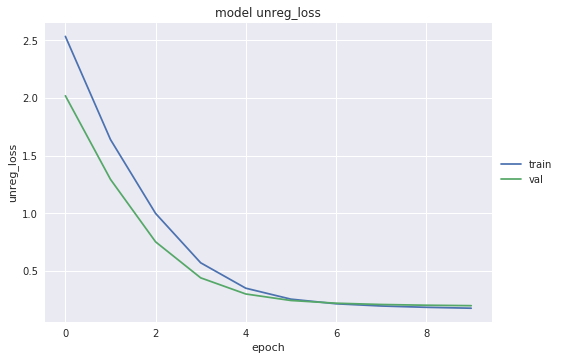

In [10]:
plot_all_metrics(history, show=True)